In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)


In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

print("Dataset Loaded Successfully!")
print("Features:", X.shape[1])
print("Samples:", X.shape[0])
print("Target classes:", data.target_names)


Dataset Loaded Successfully!
Features: 30
Samples: 569
Target classes: ['malignant' 'benign']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

y_pred_train = np.full(y_train.shape, y_train.mean())
y_pred_test = np.full(y_test.shape, y_train.mean())

print("Initial mean prediction:", y_train.mean())


Initial mean prediction: 0.6263736263736264


In [ ]:
n_estimators = 100
learning_rate = 0.1
max_depth = 1


In [ ]:
for i in range(n_estimators):
    residuals = y_train - y_pred_train

    reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    reg.fit(X_train, residuals)

    train_residual_pred = reg.predict(X_train)
    test_residual_pred = reg.predict(X_test)

    y_pred_train += learning_rate * train_residual_pred
    y_pred_test += learning_rate * test_residual_pred

    if (i + 1) % 10 == 0:
        train_loss = np.mean((y_train - y_pred_train) ** 2)
        print(f"Iteration {i+1}/{n_estimators} - Training MSE: {train_loss:.4f}")


Iteration 10/100 - Training MSE: 0.0735
Iteration 20/100 - Training MSE: 0.0442
Iteration 30/100 - Training MSE: 0.0369
Iteration 40/100 - Training MSE: 0.0338
Iteration 50/100 - Training MSE: 0.0318
Iteration 60/100 - Training MSE: 0.0303
Iteration 70/100 - Training MSE: 0.0292
Iteration 80/100 - Training MSE: 0.0283
Iteration 90/100 - Training MSE: 0.0275
Iteration 100/100 - Training MSE: 0.0268


In [ ]:

y_pred_binary = (y_pred_test >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_binary)
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_binary)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary, target_names=data.target_names))



--- Model Evaluation ---
Accuracy: 0.9386
Precision: 0.9452
Recall: 0.9583
F1-Score: 0.9517
ROC AUC: 0.9940

Confusion Matrix:
 [[38  4]
 [ 3 69]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



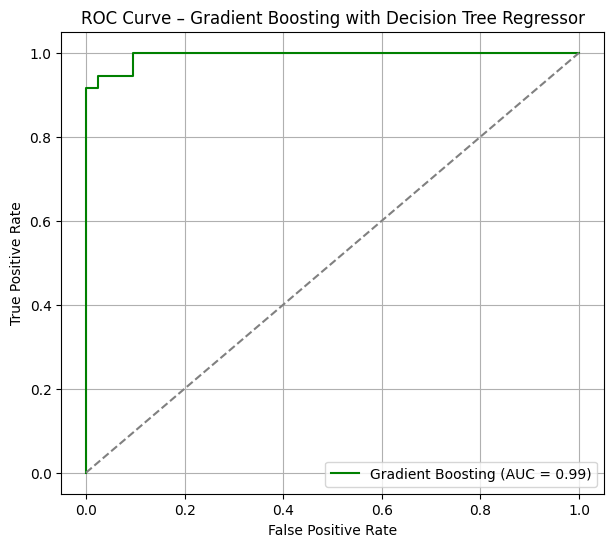

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='green', label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve – Gradient Boosting with Decision Tree Regressor")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
